# Logistic Regression

Logistic Regression model is actually apply a logical function at the basis of linear regression. Beacause this method is simple and effective, it has become a shining star at the field of machine learning and the core of computational advertising. This chapter is mainly introducing the basis of logistic regression. 


## 1. Logestic regression model
Logestic is a model which can be understood easily, which is equal to $y=f(x)$, shows the relationship between independent variable $x$ and dependent variable $y$. The most common questions are like the doctor's observation, hearing, asking and cutting during treatment, and then determining whether the patient is ill or what kind of disease he has. The observation, hearing and cutting is to obtain the independent variable $x$, that is, the characteristic data, while the determination of whether the patient is ill is equivalent to the acquisition of the dependent variable $y$, that is, the prediction classification.

The most simple regression is linear regression. Using Andrew NG's handout, as shown in the figure, $X$ is number point -- tumor size, $Y$ is the observed value -- whether a malignant tumor or not. By building a linear regression model, as shown in $h_\theta(x)$, we can predict whether $h_\theta(x)) \ge 0.5$ is malignant and $h_\theta(x) \lt 0.5$ is benign according to the size of the tumor.

![LinearRegression](images/fig1.gif)

However the linear regression have poor robust, for example if we want to built regression in upper graph, the regression model perform badly in the training set because of the noise point on the right. This is mainly because that the linear regression have a same sensitivity in the whole real number field, however for the range for sort is in $[0,1]$.

Logestic regression is a kind of regression model which decrease the predict range and limit the prediction value to $[0,1]$, the regression function and curve is shown in graph 2. When the logestic curve is in $z=0$, it is very sensitive, while at $z>>0$ or $z<<0$, the result is not sensitive, we set the predict value to $(0,1)$.



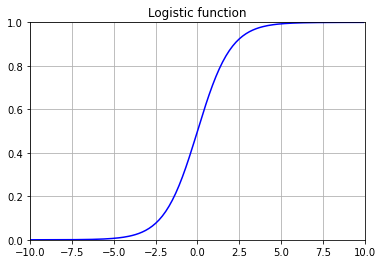

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.axis([-10,10,0,1])
plt.grid(True)
X=np.arange(-10,10,0.1)
y=1/(1+np.e**(-X))
plt.plot(X,y,'b-')
plt.title("Logistic function")
plt.show()

### 1.1 Logestic regression expression

The function of logestic function, which is also called sigmoid function. The formula of function is defined as:

$$
g(z) = \frac{1}{1+e^{-z}}
$$

For logistic function, when $z$ is approach infinity, $g(z)$ is approach to 1. While $z$ is approach minus infinity, $g(z)$ is approach to 0. The graph for logestic function is shown as upper figure. Logistic funciton has an attribute when doing derivative which will be used in the following derivation, the characteristic is:

$$
g'(z) =  \frac{d}{dz} \frac{1}{1+e^{-z}} \\
      =  \frac{1}{(1+e^{-z})^2}(e^{-z}) \\
      =  \frac{1}{(1+e^{-z})} (1 - \frac{1}{(1+e^{-z})}) \\
      =  g(z)(1-g(z))
$$



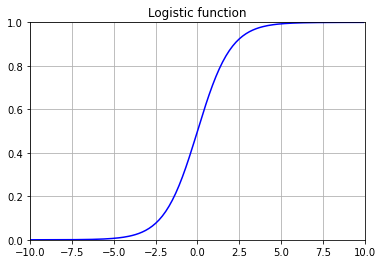

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.axis([-10,10,0,1])
plt.grid(True)
X=np.arange(-10,10,0.1)
y=1/(1+np.e**(-X))
plt.plot(X,y,'b-')
plt.title("Logistic function")
plt.show()

Logistic regression is essentially linear regression, only add a layer of function map in the mapping from characteristic and result, which is add linear characteristic first and then use function $g(z)$ as the hypothesis function to predict. $g(z)$ can map continuous value between 0 and 1. We put the expression of logestic model into $g(z)$ to get the expression of logestic regression

$$
h_\theta(x) = g(\theta^T x) = \frac{1}{1+e^{-\theta^T x}}
$$

### 1.2 Soft classification of logestic regression

Now we normalize the value of y $h_\theta(x)$ to between (0,1) by Logistic function. The value of $y$ have special meaning, which represent the probability that the result getting 1. Therefore the probabilities of input $x$ classification result as category 1 and category 0 are respectively:

$$
P(y=1|x,\theta) = h_\theta(x) \\
P(y=0|x,\theta) = 1 - h_\theta(x)
$$

We merge the upper function can get:

$$
p(y|x,\theta) = (h_\theta(x))^y (1 - h_\theta(x))^{1-y}
$$



### 1.3 Gradient rise

When we get the expression for logestic regression, the next step is similar to linear regerssion. We bulid likelihood function then do the maximum likelihood estimation to derive the iteration udate expression for $\theta$. However we use gradient rise rather than gradient descent beacuse this is maximum likelihood function.

We assume that the training sample are independent with each other, so that the linkelihood function expression is:
![Loss](images/eq_loss.png)

Similarly, take the log of likelihood function, we can get:

![LogLoss](images/eq_logloss.png)

Takes the partial derivative of $\theta$ to converted likelihood function, we take a case where there is only one training sample:

![LogLossDiff](images/eq_logloss_diff.png)

In the process of getting patial derivative:
* The first step is to convert the partial derivative of $\theta$, according to the partial formula: $y= LNX $, $y'=1/x$.
* The second step is to use the characteristic of $g(z)$ when doing derivative: $g'(z) = g(z)(1 - g(z))$ 
* The third step was normal translation.

In this way, we get the update direction of graient rise in every iteration, so that the iteration expression of $\theta$ is: 

$$
\theta_j := \theta_j + \alpha(y^i - h_\theta(x^i)) x_j^i
$$



### 1.4 The sample program

In [23]:
from __future__ import division
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt

np.random.seed(0)


data  =  [[ 0.694565    0.42666408]
 [ 1.68353008 -0.80016643]
 [-0.25046823  0.24392224]
 [-1.13337973 -0.6112787 ]
 [ 1.76905577 -0.31025439]
 [ 2.00225511 -0.18592   ]
 [ 0.91169861  0.46995543]
 [ 0.88211794 -0.46701178]
 [ 0.75006972  0.33995342]
 [ 1.30208867 -0.72334923]]
label =  [0 1 1 0 1 1 0 1 0 1]


Text(0.5, 1.0, 'Original Data')

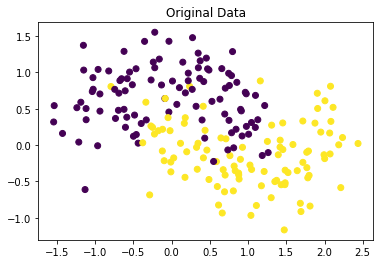

In [24]:
# load sample data
data, label = sklearn.datasets.make_moons(200, noise=0.30)

print("data  = ", data[:10, :])
print("label = ", label[:10])

plt.scatter(data[:,0], data[:,1], c=label)
plt.title("Original Data")

In [25]:
def plot_decision_boundary(predict_func, data, label):
    """Draw result
    Args:
        pred_func (callable): Predict function
        data (numpy.ndarray): Training data set
        label (numpy.ndarray): Training data label
        ravel() split the data, without changing the original data
    """
    x_min, x_max = data[:, 0].min() - .5, data[:, 0].max() + .5
    y_min, y_max = data[:, 1].min() - .5, data[:, 1].max() + .5
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = predict_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(data[:, 0], data[:, 1], c=label, cmap=plt.cm.Spectral)
    plt.show()



In [34]:
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

class Logistic(object):
    """logestic regression model"""
    def __init__(self, data, label):
        self.data = data
        self.label = label

        self.data_num, n = np.shape(data)
        self.weights = np.ones(n)
        self.b = 1

    def train(self, num_iteration=150):
        """Random gradient rise algorithm
        Args:
            data (numpy.ndarray): Training data set
            labels (numpy.ndarray): Training label
            num_iteration (int): Iteration times
        """
        for j in range(num_iteration):
            data_index = list(range(self.data_num))
            for i in range(self.data_num):
                # learning rate
                alpha = 0.01
                rand_index = int(np.random.uniform(0, len(data_index))) #Choose trianing radomly
                error = self.label[rand_index] - sigmoid(sum(self.data[rand_index] * self.weights + self.b))
                self.weights += alpha * error * self.data[rand_index]
                self.b += alpha * error
                del(data_index[rand_index]) 

    def predict(self, predict_data):
        """Predict function"""
        result = list(map(lambda x: 1 if sum(self.weights * x + self.b) > 0 else 0,
                     predict_data))
        return np.array(result)


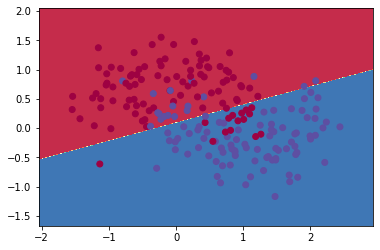

In [40]:
logistic = Logistic(data, label)
logistic.train(200)
plot_decision_boundary(lambda x:logistic.predict(x) , data, label)　#lambda generate callable function

## 2. How to use sklearn solve logestic regression?

accuracy train = 0.825000
accuracy test = 0.900000


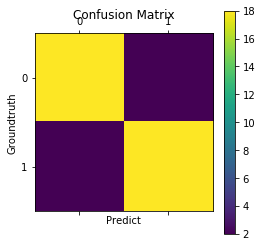

In [7]:
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# calculate train/test data number
N = len(data)
N_train = int(N*0.8)
N_test = N - N_train

# split train/test data
x_train = data[:N_train, :]
y_train = label[:N_train]
x_test  = data[N_train:, :]
y_test  = label[N_train:]

# do logistic regression
lr=LogisticRegression()
lr.fit(x_train,y_train)

pred_train = lr.predict(x_train)
pred_test  = lr.predict(x_test)

# calculate train/test accuracy
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print("accuracy train = %f" % acc_train)
print("accuracy test = %f" % acc_test)

# plot confusion matrix
cm = confusion_matrix(y_test,pred_test)

plt.matshow(cm)
plt.title(u'Confusion Matrix')
plt.colorbar()
plt.ylabel(u'Groundtruth')
plt.xlabel(u'Predict')
plt.show()

## 3. Multiple recognition problem

### 3.1 Load display data

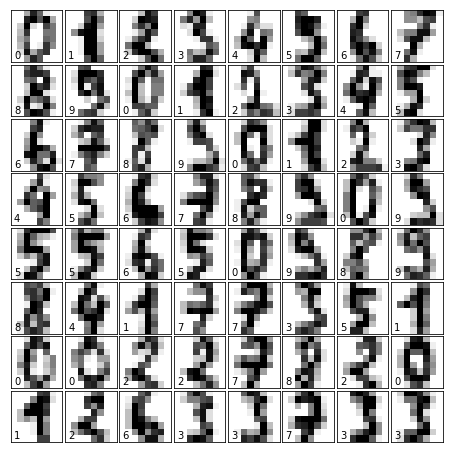

In [8]:
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits

# load data
digits = load_digits()

# copied from notebook 02_sklearn_data.ipynb
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary)
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

### 3.2 Visual characteristics

For the problem in machine learing, one good way is to reduce original high dimension to 2-3 dimension by dimension reduction and visual processing. In this way, we can have a  preliminary understanding of the data to be processed. The simplist dimension reduction method Principal Component Analysisi(PCA) is introduced.

PCA seeks orthogonal linear combinations of features with maximum variance so that we can better understand the structure of the data. At here, we will use Randomized PCA, because it will ahcieve a better computational effenciency when the data number $N$ is relatively large.



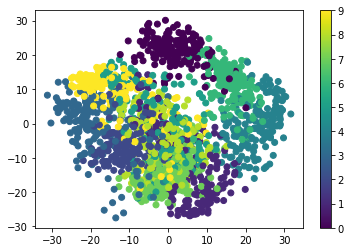

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver="randomized")
proj = pca.fit_transform(digits.data)

plt.scatter(proj[:, 0], proj[:, 1], c=digits.target)
plt.colorbar()

One disadvantage of PCA is that it may loss some interesting interconnections. We can use some manifold module method to see the nolinear dimension reduction and mapping.
Here we will use[Isomap](https://blog.csdn.net/VictoriaW/article/details/78497316)(Series isometric mapping) which is a manifold dimension redution method based on graph theory.

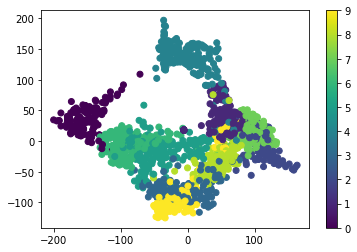

In [10]:
from sklearn.manifold import Isomap
iso = Isomap(n_neighbors=5, n_components=2)
proj = iso.fit_transform(digits.data)

plt.scatter(proj[:, 0], proj[:, 1], c=digits.target)
plt.colorbar()

### 3.3 The sample program

In [11]:
from sklearn.datasets import load_digits
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt 

# load digital data
digits, dig_label = load_digits(return_X_y=True)
print(digits.shape)

# calculate train/test data number
N = len(digits)
N_train = int(N*0.8)
N_test = N - N_train

# split train/test data
x_train = digits[:N_train, :]
y_train = dig_label[:N_train]
x_test  = digits[N_train:, :]
y_test  = dig_label[N_train:]

# FIXME: need to use Isomap to transform data

# do logistic regression
lr=LogisticRegression()
lr.fit(x_train,y_train)

pred_train = lr.predict(x_train)
pred_test  = lr.predict(x_test)

# calculate train/test accuracy
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print("accuracy train = %f, accuracy_test = %f" % (acc_train, acc_test))

score_train = lr.score(x_train, y_train)
score_test  = lr.score(x_test, y_test)
print("score_train = %f, score_test = %f" % (score_train, score_test))



(1797, 64)
accuracy train = 0.998608, accuracy_test = 0.897222
score_train = 0.998608, score_test = 0.897222


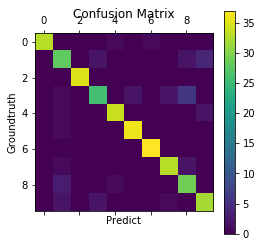

In [12]:
from sklearn.metrics import confusion_matrix

# plot confusion matrix
cm = confusion_matrix(y_test,pred_test)

plt.matshow(cm)
plt.title(u'Confusion Matrix')
plt.colorbar()
plt.ylabel(u'Groundtruth')
plt.xlabel(u'Predict')
plt.show()

## 4. Pratice-How to draw misclassified data?

1. How to get the index of misclassified data？
2. How to do visiualizaion to these misclassified data according to their index？

## References

* [逻辑回归模型(Logistic Regression, LR)基础](https://www.cnblogs.com/sparkwen/p/3441197.html)
* [逻辑回归（Logistic Regression）](http://www.cnblogs.com/BYRans/p/4713624.html)